Dataset Description 

Lung Cancer Risk Dataset

This dataset contains information related to various factors that may influence the risk of lung cancer. The data includes demographic information, lifestyle habits, and symptoms that are commonly associated with lung cancer. This dataset can be used to explore correlations, build predictive models, and identify potential risk factors for lung cancer.

Purpose

*Statistical analysis to find correlations between different factors and lung cancer.

*Building machine learning models to predict lung cancer risk based on the given features.

*Identifying high-risk groups and potential preventive measures.

Data Dictionary:

GENDER: The gender of the individual (e.g., M for male, F for female).

AGE: The age of the individual in years.

SMOKING: Indicates whether the individual is a smoker (Yes/No).

YELLOW_FINGERS: Indicates whether the individual has yellow fingers (Yes/No).

ANXIETY: Indicates whether the individual suffers from anxiety (Yes/No).

PEER_PRESSURE: Indicates whether the individual is influenced by peer pressure (Yes/No).

CHRONIC_DISEASE: Indicates whether the individual has any chronic disease (Yes/No).

FATIGUE: Indicates whether the individual experiences fatigue (Yes/No).

ALLERGY: Indicates whether the individual has allergies (Yes/No).

WHEEZING: Indicates whether the individual has wheezing symptoms (Yes/No).

ALCOHOL_CONSUMING: Indicates whether the individual consumes alcohol (Yes/No).

COUGHING: Indicates whether the individual has a coughing symptom (Yes/No).

SHORTNESS_OF_BREATH: Indicates whether the individual experiences shortness of breath (Yes/No).

SWALLOWING_DIFFICULTY: Indicates whether the individual has difficulty swallowing (Yes/No).

CHEST_PAIN: Indicates whether the individual experiences chest pain (Yes/No).

LUNG_CANCER: Indicates whether the individual has been diagnosed with lung cancer (Yes/No).

In [77]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

#Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [78]:
#loading the data set

df = pd.read_csv("C:/Users/mja04/OneDrive/Data Science Capstone - MH/lung_cancer_dataset.csv")

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,NO
1,F,55,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,NO
2,F,78,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,YES
3,M,60,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,YES
4,F,80,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,NO


1. Exploratory Data Analysis

In [79]:
# check the data set

df.shape

(3000, 16)

In [80]:
# The data set contains 3000 observations (rows)and 16 variables ( columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   object
 3   YELLOW_FINGERS         3000 non-null   object
 4   ANXIETY                3000 non-null   object
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   object
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   object
 9   WHEEZING               3000 non-null   object
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   object
 12  SHORTNESS_OF_BREATH    3000 non-null   object
 13  SWALLOWING_DIFFICULTY  3000 non-null   object
 14  CHEST_PAIN             3000 non-null   object
 15  LUNG_CANCER          

In [81]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [82]:
# No missing values

df.describe([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,25%,50%,75%,95%,99%,100%,max
AGE,3000.00,55.17,14.72,30.00,30.00,32.00,42.00,55.00,68.00,78.00,80.00,80.00,80.00


In [83]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,NO
1,F,55,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,NO
2,F,78,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,YES
3,M,60,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,YES
4,F,80,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,NO


In [84]:
# Exploration of variable types

def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.

    Parameters
    ----------
    dataframe: dataframe
        variable names are the dataframe to be retrieved.
    cat_th: int, float
        class threshold for numeric but categorical variables
    car_th: int, float
        class threshold for categorical but cardinal variables

    Returns
    -------
    cat_cols: list
        Categorical variables list
    num_cols: list
        Numeric variable list
    cat_but_car: list
        List of cardinal variables with categorical view

    Notes
    ------
    cat_cols + num_cols + cat_but_car = total number of variables
    num_but_cat is inside cat_cols.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int32","int64", "float32", "float64"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int32","int64", "float32", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car, num_but_cat


cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 3000
Variables: 16
cat_cols: 15
num_cols: 1
cat_but_car: 0
num_but_cat: 0


In [85]:
# There is one numeric and 15 categorical variables

df[cat_cols].head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,NO
1,F,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,NO
2,F,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,YES
3,M,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,YES
4,F,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,NO


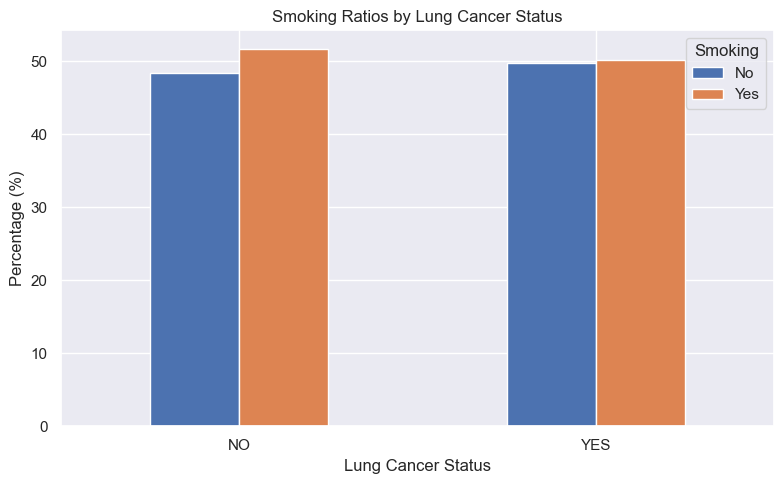

In [86]:

# Calculate ratios
ratios = df.groupby(['LUNG_CANCER', 'SMOKING']).size().unstack(fill_value=0)
ratios_percentage = (ratios.T / ratios.T.sum()).T * 100  # Convert to percentage

# Plot
ratios_percentage.plot(kind='bar', stacked=False, figsize=(8, 5))

# Customize the plot
plt.title('Smoking Ratios by Lung Cancer Status')
plt.ylabel('Percentage (%)')
plt.xlabel('Lung Cancer Status')
plt.xticks(rotation=0)
plt.legend(title='Smoking', labels=['No', 'Yes'])
plt.tight_layout()

# Show plot
plt.show()


Ratio Summary for: GENDER
GENDER          F     M
LUNG_CANCER            
NO          48.72 51.28
YES         50.33 49.67
##########################################


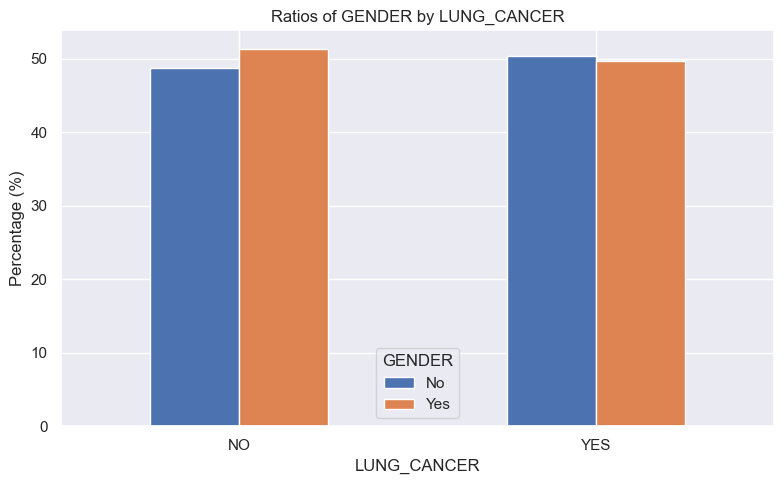

Ratio Summary for: SMOKING
SMOKING        No   Yes
LUNG_CANCER            
NO          48.38 51.62
YES         49.80 50.20
##########################################


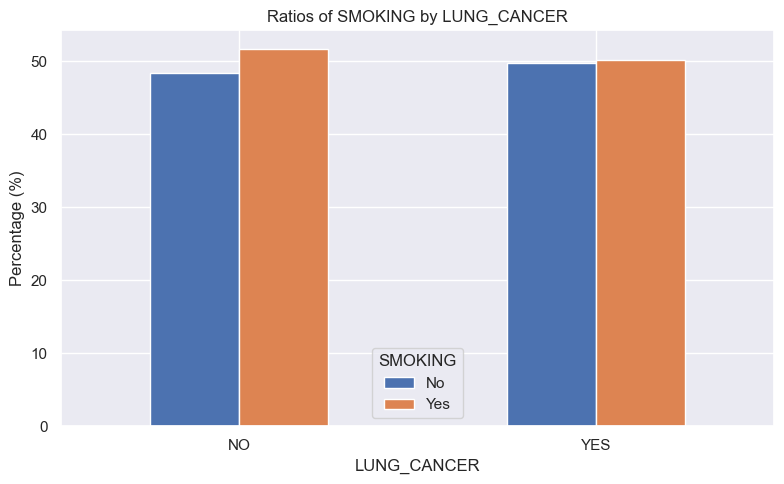

Ratio Summary for: YELLOW_FINGERS
YELLOW_FINGERS    No   Yes
LUNG_CANCER               
NO             50.74 49.26
YES            52.04 47.96
##########################################


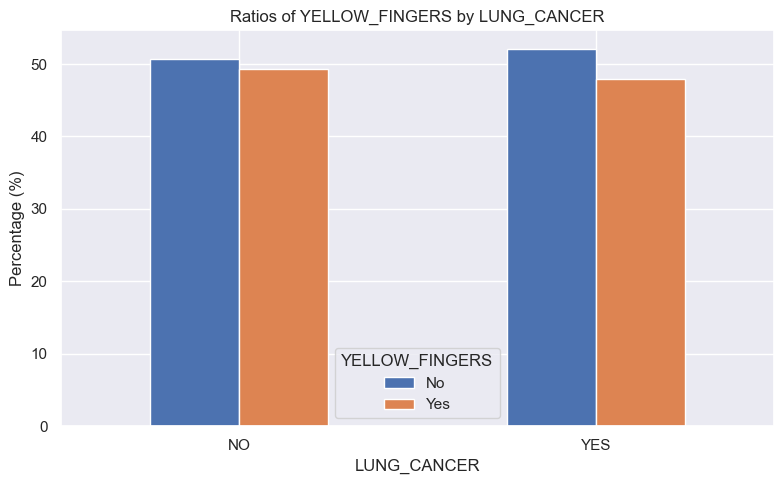

Ratio Summary for: ANXIETY
ANXIETY        No   Yes
LUNG_CANCER            
NO          50.13 49.87
YES         48.68 51.32
##########################################


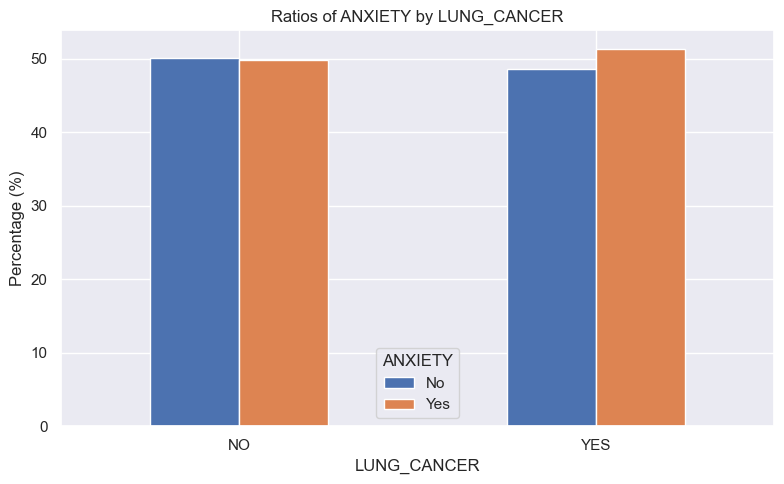

Ratio Summary for: PEER_PRESSURE
PEER_PRESSURE    No   Yes
LUNG_CANCER              
NO            51.15 48.85
YES           48.68 51.32
##########################################


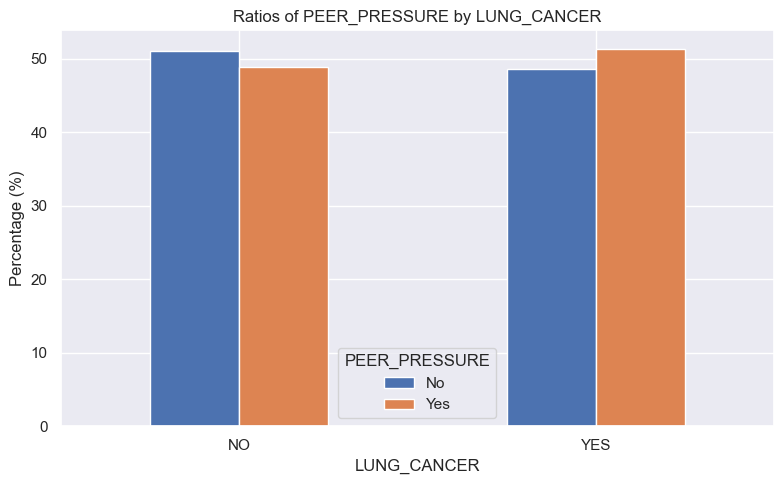

Ratio Summary for: CHRONIC_DISEASE
CHRONIC_DISEASE    No   Yes
LUNG_CANCER                
NO              51.48 48.52
YES             50.46 49.54
##########################################


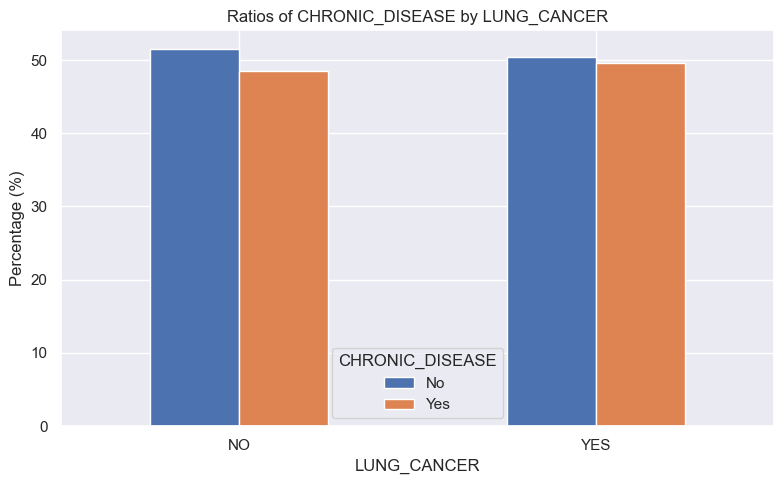

Ratio Summary for: FATIGUE
FATIGUE        No   Yes
LUNG_CANCER            
NO          48.85 51.15
YES         49.08 50.92
##########################################


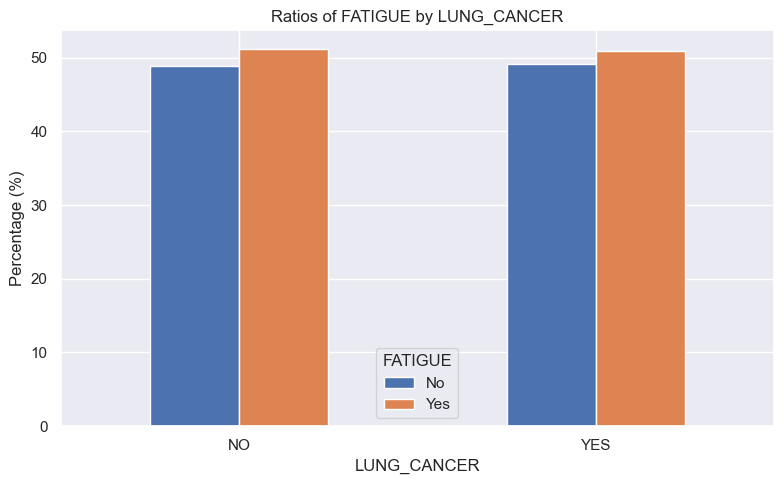

Ratio Summary for: ALLERGY
ALLERGY        No   Yes
LUNG_CANCER            
NO          50.34 49.66
YES         50.99 49.01
##########################################


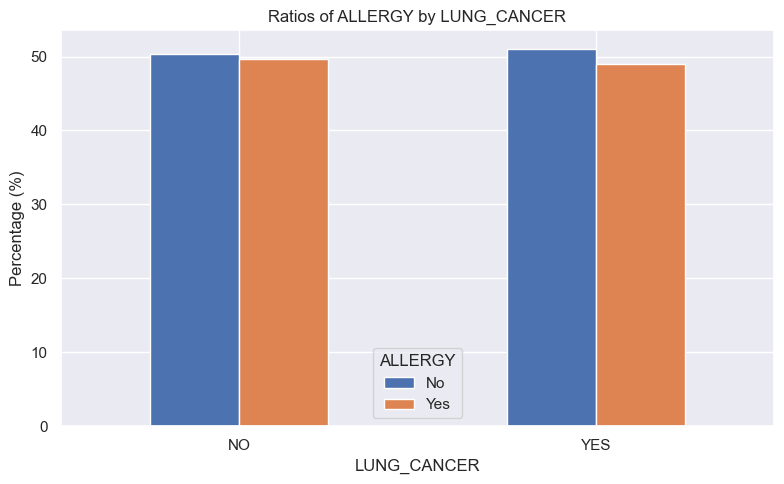

Ratio Summary for: WHEEZING
WHEEZING       No   Yes
LUNG_CANCER            
NO          51.69 48.31
YES         47.83 52.17
##########################################


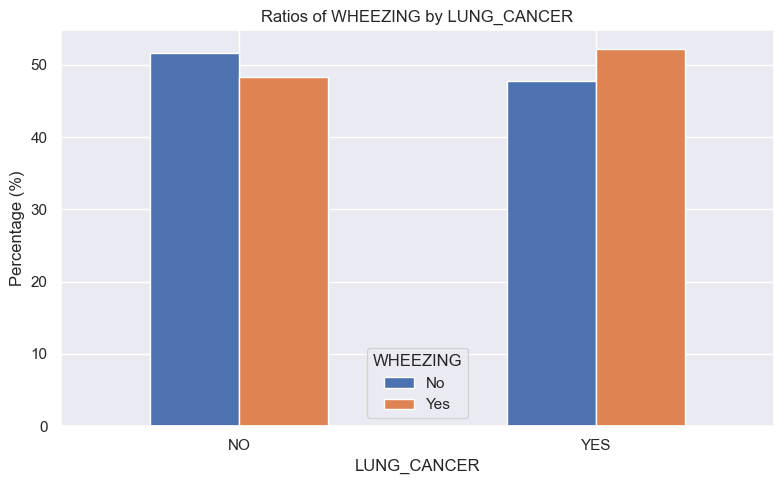

Ratio Summary for: ALCOHOL_CONSUMING
ALCOHOL_CONSUMING    No   Yes
LUNG_CANCER                  
NO                50.67 49.33
YES               47.63 52.37
##########################################


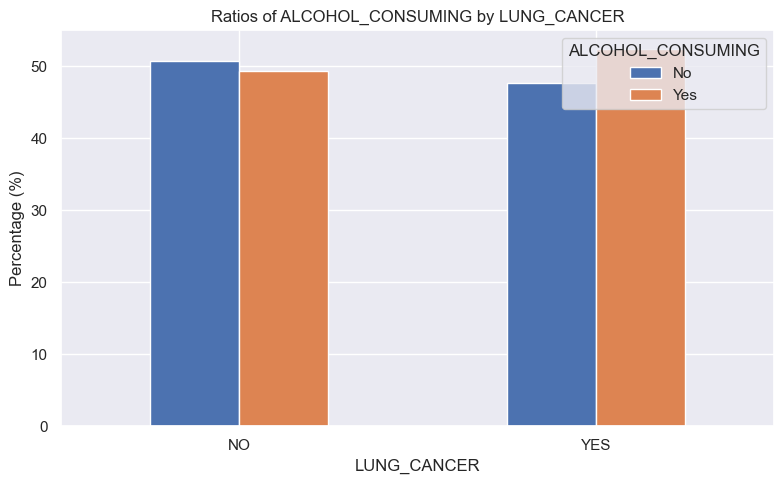

Ratio Summary for: COUGHING
COUGHING       No   Yes
LUNG_CANCER            
NO          49.39 50.61
YES         52.70 47.30
##########################################


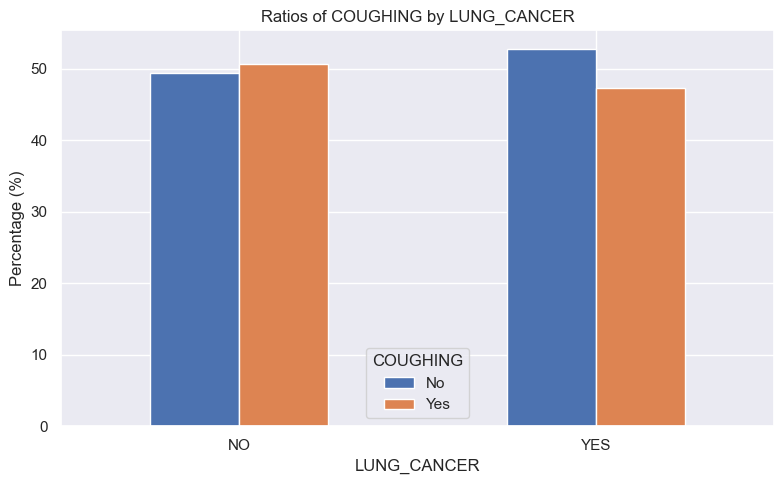

Ratio Summary for: SHORTNESS_OF_BREATH
SHORTNESS_OF_BREATH    No   Yes
LUNG_CANCER                    
NO                  48.92 51.08
YES                 48.68 51.32
##########################################


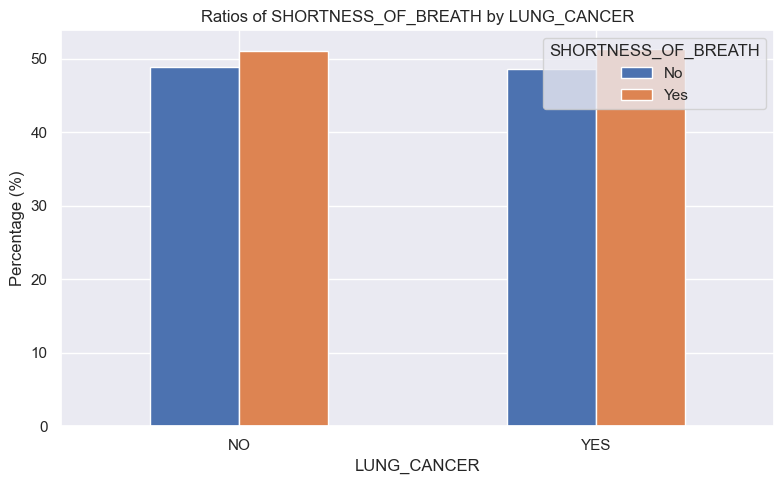

Ratio Summary for: SWALLOWING_DIFFICULTY
SWALLOWING_DIFFICULTY    No   Yes
LUNG_CANCER                      
NO                    49.39 50.61
YES                   48.55 51.45
##########################################


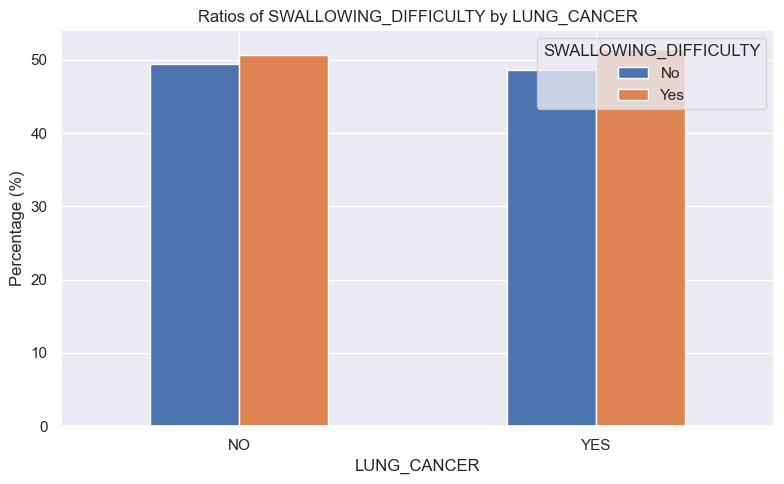

Ratio Summary for: CHEST_PAIN
CHEST_PAIN     No   Yes
LUNG_CANCER            
NO          49.73 50.27
YES         50.00 50.00
##########################################


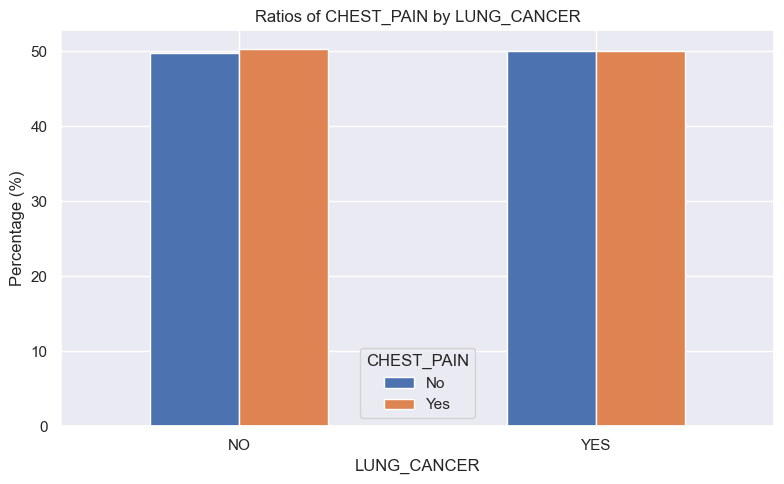

Ratio Summary for: LUNG_CANCER
LUNG_CANCER     NO    YES
LUNG_CANCER              
NO          100.00   0.00
YES           0.00 100.00
##########################################


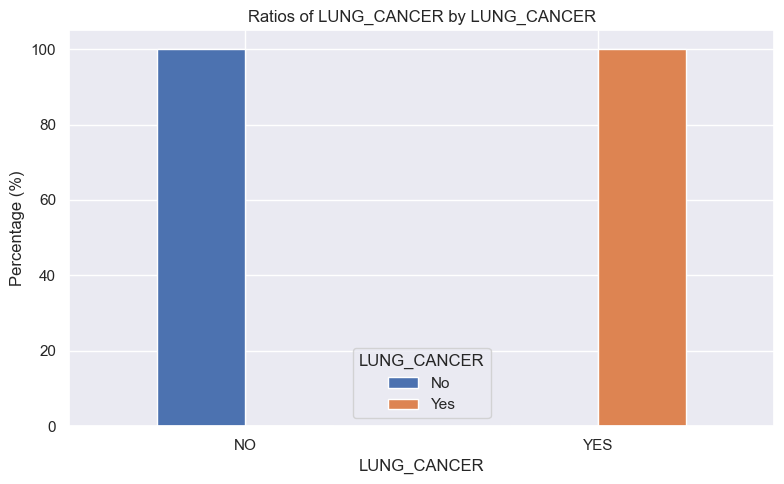

In [87]:
def cat_summary_grouped(dataframe, target_col, col_name, plot=False):
    """
    Analyze and visualize categorical variables in the context of a target variable.

    Parameters:
    - dataframe: The dataframe containing the data.
    - target_col: The target variable column name (e.g., 'Lung_Cancer').
    - col_name: The categorical variable column name (e.g., 'Smoking').
    - plot: Whether to show a grouped bar plot or not.

    """
    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

    # Grouping and calculating ratios
    group_ratios = dataframe.groupby([target_col, col_name]).size().unstack(fill_value=0)
    group_ratios_percentage = (group_ratios.T / group_ratios.T.sum()).T * 100

    #Print ratio summary
    print("Ratio Summary for:", col_name)
    print(group_ratios_percentage)
    print("##########################################")

    if plot:
        #Plotting the grouped bar chart
        group_ratios_percentage.plot(kind='bar', stacked=False, figsize=(8, 5))

        # Customizing plot
        plt.title(f'Ratios of {col_name} by {target_col}')
        plt.ylabel('Percentage (%)')
        plt.xlabel(target_col)
        plt.xticks(rotation=0)
        plt.legend(title=col_name, labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()
# Example usage
for col in cat_cols:
    cat_summary_grouped(df, target_col='LUNG_CANCER', col_name=col, plot=True)

count   3000.00
mean      55.17
std       14.72
min       30.00
5%        32.00
10%       35.00
20%       40.00
30%       45.00
40%       50.00
50%       55.00
60%       60.00
70%       65.00
80%       70.00
90%       76.00
95%       78.00
99%       80.00
max       80.00
Name: AGE, dtype: float64


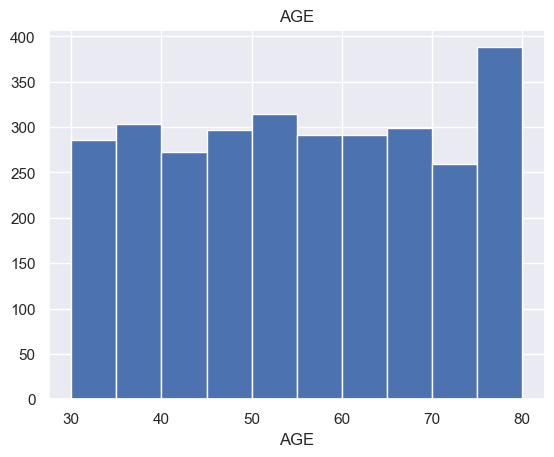

In [88]:
# Analysis of Numerical Variable AGE

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


#####################################


for col in num_cols:
    num_summary(df, col, plot=True)

In [89]:
# Analysis of Target Variable (LUNG_CANCER)

# Before analyzing the target variable, we must convert the categorical value into a numerical value
# ( Yes : 1 / No : 0)

binary_mappings = {'YES': 1, 'NO': 0}
df["LUNG_CANCER"] = df["LUNG_CANCER"].map(binary_mappings)


# Analysis of Target Variable with Categorical Variables

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df, "LUNG_CANCER", col)

        TARGET_MEAN
GENDER             
F              0.51
M              0.50


         TARGET_MEAN
SMOKING             
No              0.51
Yes             0.50


                TARGET_MEAN
YELLOW_FINGERS             
No                     0.51
Yes                    0.50


         TARGET_MEAN
ANXIETY             
No              0.50
Yes             0.51


               TARGET_MEAN
PEER_PRESSURE             
No                    0.49
Yes                   0.52


                 TARGET_MEAN
CHRONIC_DISEASE             
No                      0.50
Yes                     0.51


         TARGET_MEAN
FATIGUE             
No              0.51
Yes             0.50


         TARGET_MEAN
ALLERGY             
No              0.51
Yes             0.50


          TARGET_MEAN
WHEEZING             
No               0.49
Yes              0.53


                   TARGET_MEAN
ALCOHOL_CONSUMING             
No                        0.49
Yes                       0.52


          TARGET

2. Measures of Association
Pearson's Chi-Square is a statistical hypothesis test for independence between categorical variables.
We do this to see if the variables we are including in our model are significant to predicing lung cancer 

In [90]:
# GENDER vs LUNG_CANCER

df.groupby(["GENDER","LUNG_CANCER"]).agg({"LUNG_CANCER":"count"})

LUNG_CANCER
GENDER LUNG_CANCER             
F      0                    722
       1                    764
M      0                    760
       1                    754

In [91]:
# With 95% reliability, there is no significant association between our variables (GENDER and LUNG CANCER)
crosstab_gender_lungcancer = pd.crosstab(df["GENDER"],df["LUNG_CANCER"])
stat, p, dof, expected = chi2_contingency(crosstab_gender_lungcancer)
print('Test Statistic = %.5f, p-value = %.5f' % (stat, p))
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Test Statistic = 0.71584, p-value = 0.39751
p value is 0.3975117338177119
Independent (H0 holds true)


In [92]:
# SMOKING vs LUNG_CANCER
df.groupby(["SMOKING","LUNG_CANCER"]).agg({"LUNG_CANCER":"count"})

LUNG_CANCER
SMOKING LUNG_CANCER             
No      0                    717
        1                    756
Yes     0                    765
        1                    762

In [93]:
# With 95% reliability, there is no significant association between our variables (SMOKING and LUNG CANCER)
# No significant association between smoking and lung cancer
# a result that does not match our general knowledge
crosstab_smoking_lungcancer = pd.crosstab(df["SMOKING"],df["LUNG_CANCER"])
stat, p, dof, expected = chi2_contingency(crosstab_smoking_lungcancer)
print('Test Statistic = %.5f, p-value = %.5f' % (stat, p))
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Test Statistic = 0.55101, p-value = 0.45790
p value is 0.45790483338496013
Independent (H0 holds true)


In [94]:
# WHEEZING vs LUNG_CANCER
df.groupby(["WHEEZING","LUNG_CANCER"]).agg({"LUNG_CANCER":"count"})

LUNG_CANCER
WHEEZING LUNG_CANCER             
No       0                    766
         1                    726
Yes      0                    716
         1                    792

In [95]:
# With 95% reliability, there is a significant association between our variables ( WHEEZING and LUNG CANCER).
crosstab_wheezing_lungcancer = pd.crosstab(df["WHEEZING"],df["LUNG_CANCER"])
stat, p, dof, expected = chi2_contingency(crosstab_wheezing_lungcancer)
print('Test Statistic = %.5f, p-value = %.5f' % (stat, p))
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Test Statistic = 4.31816, p-value = 0.03771
p value is 0.037707565996137504
Dependent (reject H0)


In [96]:
# ALCOHOL_CONSUMING vs LUNG_CANCER
df.groupby(["ALCOHOL_CONSUMING","LUNG_CANCER"]).agg({"LUNG_CANCER":"count"})

LUNG_CANCER
ALCOHOL_CONSUMING LUNG_CANCER             
No                0                    751
                  1                    723
Yes               0                    731
                  1                    795

In [97]:
crosstab_alcohol_lungcancer = pd.crosstab(df["ALCOHOL_CONSUMING"],df["LUNG_CANCER"])
stat, p, dof, expected = chi2_contingency(crosstab_alcohol_lungcancer)
print('Test Statistic = %.5f, p-value = %.5f' % (stat, p))
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Test Statistic = 2.66387, p-value = 0.10265
p value is 0.10265047177736429
Independent (H0 holds true)


In [98]:
# With 95% reliability, there is no significant association between our variables (ALCOHOL_CONSUMING and LUNG CANCER)
# COUGHING vs LUNG_CANCER
df.groupby(["COUGHING","LUNG_CANCER"]).agg({"LUNG_CANCER":"count"})

LUNG_CANCER
COUGHING LUNG_CANCER             
No       0                    732
         1                    800
Yes      0                    750
         1                    718

In [99]:
# With 95% reliability, there is no significant association between our variables (COUGHING and LUNG CANCER)
crosstab_coughing_lungcancer = pd.crosstab(df["COUGHING"],df["LUNG_CANCER"])
stat, p, dof, expected = chi2_contingency(crosstab_coughing_lungcancer)
print('Test Statistic = %.5f, p-value = %.5f' % (stat, p))
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Test Statistic = 3.15324, p-value = 0.07578
p value is 0.07577623017724101
Independent (H0 holds true)


In [100]:
# Analysis of Target Variable with Numerical Variables
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "LUNG_CANCER", col)


              AGE
LUNG_CANCER      
0           55.70
1           54.65




3. Data Preprocessing & Feature Engineering

In [101]:
# Check Outlier for numerical AGE 
# Interquartile Range Method (IQR) {Boxplot method}
# Thresholds

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

#########################

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df, "AGE")
# no outliers according to our chosen criterion

False

In [102]:

# Before feature extraction, its imperitive to convert the categorical value into a numerical value as to be able to run some models. 
# ( Yes : 1 / No : 0)
convert_mappings = {'Yes': 1, 'No': 0}

binary_cat_cols = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE',
 'ALLERGY', 'WHEEZING','ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

for i in binary_cat_cols:
    df[i] = df[i].map(convert_mappings)

############################################################

df["GENDER"] = df["GENDER"].map({'F': 1, 'M': 2})

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,2,65,1,1,1,0,0,1,0,0,0,0,0,0,1,0
1,1,55,1,0,0,1,1,0,0,0,1,1,1,0,0,0
2,1,78,0,0,1,1,1,0,1,0,1,1,0,1,1,1
3,2,60,0,1,1,1,0,1,0,1,1,0,1,0,0,1
4,1,80,1,1,0,1,1,0,1,0,1,1,1,1,0,0


In [103]:
# check NA value

df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 3000 non-null   int64
 1   AGE                    3000 non-null   int64
 2   SMOKING                3000 non-null   int64
 3   YELLOW_FINGERS         3000 non-null   int64
 4   ANXIETY                3000 non-null   int64
 5   PEER_PRESSURE          3000 non-null   int64
 6   CHRONIC_DISEASE        3000 non-null   int64
 7   FATIGUE                3000 non-null   int64
 8   ALLERGY                3000 non-null   int64
 9   WHEEZING               3000 non-null   int64
 10  ALCOHOL_CONSUMING      3000 non-null   int64
 11  COUGHING               3000 non-null   int64
 12  SHORTNESS_OF_BREATH    3000 non-null   int64
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64
 14  CHEST_PAIN             3000 non-null   int64
 15  LUNG_CANCER            3000 non-null  

In [105]:
# Binning AGE into specific ranges. 

df.loc[(df['AGE'] <= 40), "NEW_AGE_CAT"] = 'under_40'
df.loc[(df['AGE'] > 40) & (df['AGE'] <= 50), "NEW_AGE_CAT"] = 'bwt40_50'
df.loc[(df['AGE'] > 50) & (df['AGE'] <= 60), "NEW_AGE_CAT"] = 'bwt50_60'
df.loc[(df['AGE'] > 60) & (df['AGE'] <= 70), "NEW_AGE_CAT"] = 'bwt60_70'
df.loc[(df['AGE'] > 70), "NEW_AGE_CAT"] = 'over_70'

In [106]:
#binary combinations of categorical variables
#Gender Combinations
df["NEW_GENDER_SMOK"] = df["GENDER"].astype(str)+"_"+ df ["SMOKING"].astype(str)
df["NEW_GENDER_ANX"] = df["GENDER"].astype(str)+"_"+ df ["ANXIETY"].astype(str)
df["NEW_GENDER_CHR_DIS"] = df["GENDER"].astype(str)+"_"+ df ["CHRONIC_DISEASE"].astype(str)
df["NEW_GENDER_WHEEZ"] = df["GENDER"].astype(str)+"_"+ df ["WHEEZING"].astype(str)
df["NEW_GENDER_ALCOHOL"] = df["GENDER"].astype(str)+"_"+ df ["ALCOHOL_CONSUMING"].astype(str)

#AGE Range Combinations 
df["NEW_AGECAT_SMOK"] = df["NEW_AGE_CAT"].astype(str)+"_"+ df ["SMOKING"].astype(str)
df["NEW_AGECAT_ANX"] = df["NEW_AGE_CAT"].astype(str)+"_"+ df ["ANXIETY"].astype(str)
df["NEW_AGECAT_CHR_DIS"] = df["NEW_AGE_CAT"].astype(str)+"_"+ df ["CHRONIC_DISEASE"].astype(str)
df["NEW_AGECAT_WEEZ"] = df["NEW_AGE_CAT"].astype(str)+"_"+ df ["WHEEZING"].astype(str)
df["NEW_AGECAT_ALCOHOL"] = df["NEW_AGE_CAT"].astype(str)+"_"+ df ["ALCOHOL_CONSUMING"].astype(str)

#Smoker Combinations 
df["NEW_SMOK_YELL_FING"] = df["SMOKING"].astype(str)+"_"+ df ["YELLOW_FINGERS"].astype(str)
df["NEW_SMOK_ANXIETY"] = df["SMOKING"].astype(str)+"_" + df ["ANXIETY"].astype(str)
df["NEW_SMOK_CHRONIC_DIS"] = df["SMOKING"].astype(str)+"_" + df ["CHRONIC_DISEASE"].astype(str)
df["NEW_SMOK_WHEEZ"] = df["SMOKING"].astype(str) +"_"+ df ["WHEEZING"].astype(str)
df["NEW_SMOK_ALCOHOL"] = df["SMOKING"].astype(str) +"_"+ df ["ALCOHOL_CONSUMING"].astype(str)
df["NEW_SMOK_COUGH"] = df["SMOKING"].astype(str) +"_"+ df ["COUGHING"].astype(str)
df["NEW_SMOK_SH_BREATH"] = df["SMOKING"].astype(str) +"_"+ df ["SHORTNESS_OF_BREATH"].astype(str)
df["NEW_SMOK_CHEST_PAIN"] = df["SMOKING"].astype(str) +"_"+ df ["CHEST_PAIN"].astype(str)

#Chronic Disease combinations
df["NEW_CHRONIC_DISEASE_FAT"] = df["CHRONIC_DISEASE"].astype(str) +"_"+ df ["FATIGUE"].astype(str)
df["NEW_CHRONIC_ALLERGY"] = df["CHRONIC_DISEASE"].astype(str) +"_"+ df ["ALLERGY"].astype(str)
df["NEW_CHRONIC_WHEEZING"] = df["CHRONIC_DISEASE"].astype(str) +"_"+ df ["WHEEZING"].astype(str)
df["NEW_CHRONIC_ALCOHOL"] = df["CHRONIC_DISEASE"].astype(str) +"_"+ df ["ALCOHOL_CONSUMING"].astype(str)
df["NEW_CHRONIC_COUGHING"] = df["CHRONIC_DISEASE"].astype(str) +"_"+ df ["COUGHING"].astype(str)
df["NEW_CHRONIC_SH_BREATH"] = df["CHRONIC_DISEASE"].astype(str) +"_"+ df ["SHORTNESS_OF_BREATH"].astype(str)
df["NEW_CHRONIC_SWALL_DIFF"] = df["CHRONIC_DISEASE"].astype(str) +"_"+ df ["SWALLOWING_DIFFICULTY"].astype(str)
df["NEW_CHRONIC_CHEST_PAIN"] = df["CHRONIC_DISEASE"].astype(str) +"_"+ df ["CHEST_PAIN"].astype(str)

#Wheezing combinations 
df["NEW_WHEEZING_ALCOHOL"] = df["WHEEZING"].astype(str) +"_"+ df ["ALCOHOL_CONSUMING"].astype(str)
df["NEW_WHEEZING_COUGHING"] = df["WHEEZING"].astype(str) +"_"+ df ["COUGHING"].astype(str)
df["NEW_WHEEZING_SH_BREATH"] = df["WHEEZING"].astype(str) +"_"+ df ["SHORTNESS_OF_BREATH"].astype(str)
df["NEW_WHEEZING_SWALL_DIFF"] = df["WHEEZING"].astype(str) +"_"+ df ["SWALLOWING_DIFFICULTY"].astype(str)

# Triple combinations of substance variables(smoker/drinker)
df["NEW_SMOK_ALC_COUGH"] = df["SMOKING"].astype(str) +"_"+ df ["ALCOHOL_CONSUMING"].astype(str) +"_"+ df ["COUGHING"].astype(str)
df["NEW_SMOK_ALC_SH_O_BREATH"] = df["SMOKING"].astype(str) +"_"+ df ["ALCOHOL_CONSUMING"].astype(str) +"_"+ df ["SHORTNESS_OF_BREATH"].astype(str)
df["NEW_SMOK_ALC_SWALL_DIFF"] = df["SMOKING"].astype(str) +"_"+ df ["ALCOHOL_CONSUMING"].astype(str) +"_"+ df ["SWALLOWING_DIFFICULTY"].astype(str)
df["NEW_SMOK_ALC_CHEST_PAIN"] = df["SMOKING"].astype(str) +"_"+ df ["ALCOHOL_CONSUMING"].astype(str) +"_"+ df ["CHEST_PAIN"].astype(str)
df["NEW_SMOK_ALC_WHEEZING"] = df["SMOKING"].astype(str) +"_"+ df ["ALCOHOL_CONSUMING"].astype(str) +"_"+ df ["WHEEZING"].astype(str)

#Anxiety and chronic disease triple combination
df["NEW_ANX_CHRONIC_DIS_ALLERGY"] = df["ANXIETY"].astype(str) +"_"+ df ["CHRONIC_DISEASE"].astype(str) +"_"+ df ["ALLERGY"].astype(str)
df["NEW_ANX_CHRONIC_DIS_WHEEZING"] = df["ANXIETY"].astype(str) +"_"+ df ["CHRONIC_DISEASE"].astype(str) +"_"+ df ["WHEEZING"].astype(str)

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,NEW_AGE_CAT,NEW_GENDER_SMOK,NEW_GENDER_ANX,NEW_GENDER_CHR_DIS,NEW_GENDER_WHEEZ,NEW_GENDER_ALCOHOL,NEW_AGECAT_SMOK,NEW_AGECAT_ANX,NEW_AGECAT_CHR_DIS,NEW_AGECAT_WEEZ,NEW_AGECAT_ALCOHOL,NEW_SMOK_YELL_FING,NEW_SMOK_ANXIETY,NEW_SMOK_CHRONIC_DIS,NEW_SMOK_WHEEZ,NEW_SMOK_ALCOHOL,NEW_SMOK_COUGH,NEW_SMOK_SH_BREATH,NEW_SMOK_CHEST_PAIN,NEW_CHRONIC_DISEASE_FAT,NEW_CHRONIC_ALLERGY,NEW_CHRONIC_WHEEZING,NEW_CHRONIC_ALCOHOL,NEW_CHRONIC_COUGHING,NEW_CHRONIC_SH_BREATH,NEW_CHRONIC_SWALL_DIFF,NEW_CHRONIC_CHEST_PAIN,NEW_WHEEZING_ALCOHOL,NEW_WHEEZING_COUGHING,NEW_WHEEZING_SH_BREATH,NEW_WHEEZING_SWALL_DIFF,NEW_SMOK_ALC_COUGH,NEW_SMOK_ALC_SH_O_BREATH,NEW_SMOK_ALC_SWALL_DIFF,NEW_SMOK_ALC_CHEST_PAIN,NEW_SMOK_ALC_WHEEZING,NEW_ANX_CHRONIC_DIS_ALLERGY,NEW_ANX_CHRONIC_DIS_WHEEZING
0,2,65,1,1,1,0,0,1,0,0,0,0,0,0,1,0,bwt60_70,2_1,2_1,2_0,2_0,2_0,bwt60_70_1,bwt60_70_1,bwt60_70_0,bwt60_70_0,bwt60_70_0,1_1,1_1,1_0,1_0,1_0,1_0,1_0,1_1,0_1,0_0,0_0,0_0,0_0,0_0,0_0,0_1,0_0,0_0,0_0,0_0,1_0_0,1_0_0,1_0_0,1_0_1,1_0_0,1_0_0,1_0_0
1,1,55,1,0,0,1,1,0,0,0,1,1,1,0,0,0,bwt50_60,1_1,1_0,1_1,1_0,1_1,bwt50_60_1,bwt50_60_0,bwt50_60_1,bwt50_60_0,bwt50_60_1,1_0,1_0,1_1,1_0,1_1,1_1,1_1,1_0,1_0,1_0,1_0,1_1,1_1,1_1,1_0,1_0,0_1,0_1,0_1,0_0,1_1_1,1_1_1,1_1_0,1_1_0,1_1_0,0_1_0,0_1_0
2,1,78,0,0,1,1,1,0,1,0,1,1,0,1,1,1,over_70,1_0,1_1,1_1,1_0,1_1,over_70_0,over_70_1,over_70_1,over_70_0,over_70_1,0_0,0_1,0_1,0_0,0_1,0_1,0_0,0_1,1_0,1_1,1_0,1_1,1_1,1_0,1_1,1_1,0_1,0_1,0_0,0_1,0_1_1,0_1_0,0_1_1,0_1_1,0_1_0,1_1_1,1_1_0
3,2,60,0,1,1,1,0,1,0,1,1,0,1,0,0,1,bwt50_60,2_0,2_1,2_0,2_1,2_1,bwt50_60_0,bwt50_60_1,bwt50_60_0,bwt50_60_1,bwt50_60_1,0_1,0_1,0_0,0_1,0_1,0_0,0_1,0_0,0_1,0_0,0_1,0_1,0_0,0_1,0_0,0_0,1_1,1_0,1_1,1_0,0_1_0,0_1_1,0_1_0,0_1_0,0_1_1,1_0_0,1_0_1
4,1,80,1,1,0,1,1,0,1,0,1,1,1,1,0,0,over_70,1_1,1_0,1_1,1_0,1_1,over_70_1,over_70_0,over_70_1,over_70_0,over_70_1,1_1,1_0,1_1,1_0,1_1,1_1,1_1,1_0,1_0,1_1,1_0,1_1,1_1,1_1,1_1,1_0,0_1,0_1,0_1,0_1,1_1_1,1_1_1,1_1_1,1_1_0,1_1_0,0_1_1,0_1_0


In [107]:
new_columns_df = df.loc[:, df.columns.str.contains("NEW")]
new_columns_df.head()

,NEW_AGE_CAT,NEW_GENDER_SMOK,NEW_GENDER_ANX,NEW_GENDER_CHR_DIS,NEW_GENDER_WHEEZ,NEW_GENDER_ALCOHOL,NEW_AGECAT_SMOK,NEW_AGECAT_ANX,NEW_AGECAT_CHR_DIS,NEW_AGECAT_WEEZ,NEW_AGECAT_ALCOHOL,NEW_SMOK_YELL_FING,NEW_SMOK_ANXIETY,NEW_SMOK_CHRONIC_DIS,NEW_SMOK_WHEEZ,NEW_SMOK_ALCOHOL,NEW_SMOK_COUGH,NEW_SMOK_SH_BREATH,NEW_SMOK_CHEST_PAIN,NEW_CHRONIC_DISEASE_FAT,NEW_CHRONIC_ALLERGY,NEW_CHRONIC_WHEEZING,NEW_CHRONIC_ALCOHOL,NEW_CHRONIC_COUGHING,NEW_CHRONIC_SH_BREATH,NEW_CHRONIC_SWALL_DIFF,NEW_CHRONIC_CHEST_PAIN,NEW_WHEEZING_ALCOHOL,NEW_WHEEZING_COUGHING,NEW_WHEEZING_SH_BREATH,NEW_WHEEZING_SWALL_DIFF,NEW_SMOK_ALC_COUGH,NEW_SMOK_ALC_SH_O_BREATH,NEW_SMOK_ALC_SWALL_DIFF,NEW_SMOK_ALC_CHEST_PAIN,NEW_SMOK_ALC_WHEEZING,NEW_ANX_CHRONIC_DIS_ALLERGY,NEW_ANX_CHRONIC_DIS_WHEEZING
0,bwt60_70,2_1,2_1,2_0,2_0,2_0,bwt60_70_1,bwt60_70_1,bwt60_70_0,bwt60_70_0,bwt60_70_0,1_1,1_1,1_0,1_0,1_0,1_0,1_0,1_1,0_1,0_0,0_0,0_0,0_0,0_0,0_0,0_1,0_0,0_0,0_0,0_0,1_0_0,1_0_0,1_0_0,1_0_1,1_0_0,1_0_0,1_0_0
1,bwt50_60,1_1,1_0,1_1,1_0,1_1,bwt50_60_1,bwt50_60_0,bwt50_60_1,bwt50_60_0,bwt50_60_1,1_0,1_0,1_1,1_0,1_1,1_1,1_1,1_0,1_0,1_0,1_0,1_1,1_1,1_1,1_0,1_0,0_1,0_1,0_1,0_0,1_1_1,1_1_1,1_1_0,1_1_0,1_1_0,0_1_0,0_1_0
2,over_70,1_0,1_1,1_1,1_0,1_1,over_70_0,over_70_1,over_70_1,over_70_0,over_70_1,0_0,0_1,0_1,0_0,0_1,0_1,0_0,0_1,1_0,1_1,1_0,1_1,1_1,1_0,1_1,1_1,0_1,0_1,0_0,0_1,0_1_1,0_1_0,0_1_1,0_1_1,0_1_0,1_1_1,1_1_0
3,bwt50_60,2_0,2_1,2_0,2_1,2_1,bwt50_60_0,bwt50_60_1,bwt50_60_0,bwt50_60_1,bwt50_60_1,0_1,0_1,0_0,0_1,0_1,0_0,0_1,0_0,0_1,0_0,0_1,0_1,0_0,0_1,0_0,0_0,1_1,1_0,1_1,1_0,0_1_0,0_1_1,0_1_0,0_1_0,0_1_1,1_0_0,1_0_1
4,over_70,1_1,1_0,1_1,1_0,1_1,over_70_1,over_70_0,over_70_1,over_70_0,over_70_1,1_1,1_0,1_1,1_0,1_1,1_1,1_1,1_0,1_0,1_1,1_0,1_1,1_1,1_1,1_1,1_0,0_1,0_1,0_1,0_1,1_1_1,1_1_1,1_1_1,1_1_0,1_1_0,0_1_1,0_1_0


In [108]:
new_columns_df_col = new_columns_df.columns
new_columns_df_col

Index(['NEW_AGE_CAT', 'NEW_GENDER_SMOK', 'NEW_GENDER_ANX', 'NEW_GENDER_CHR_DIS', 'NEW_GENDER_WHEEZ', 'NEW_GENDER_ALCOHOL', 'NEW_AGECAT_SMOK', 'NEW_AGECAT_ANX', 'NEW_AGECAT_CHR_DIS', 'NEW_AGECAT_WEEZ', 'NEW_AGECAT_ALCOHOL', 'NEW_SMOK_YELL_FING', 'NEW_SMOK_ANXIETY', 'NEW_SMOK_CHRONIC_DIS', 'NEW_SMOK_WHEEZ', 'NEW_SMOK_ALCOHOL', 'NEW_SMOK_COUGH', 'NEW_SMOK_SH_BREATH', 'NEW_SMOK_CHEST_PAIN', 'NEW_CHRONIC_DISEASE_FAT', 'NEW_CHRONIC_ALLERGY', 'NEW_CHRONIC_WHEEZING', 'NEW_CHRONIC_ALCOHOL',
       'NEW_CHRONIC_COUGHING', 'NEW_CHRONIC_SH_BREATH', 'NEW_CHRONIC_SWALL_DIFF', 'NEW_CHRONIC_CHEST_PAIN', 'NEW_WHEEZING_ALCOHOL', 'NEW_WHEEZING_COUGHING', 'NEW_WHEEZING_SH_BREATH', 'NEW_WHEEZING_SWALL_DIFF', 'NEW_SMOK_ALC_COUGH', 'NEW_SMOK_ALC_SH_O_BREATH', 'NEW_SMOK_ALC_SWALL_DIFF', 'NEW_SMOK_ALC_CHEST_PAIN', 'NEW_SMOK_ALC_WHEEZING', 'NEW_ANX_CHRONIC_DIS_ALLERGY', 'NEW_ANX_CHRONIC_DIS_WHEEZING'],
      dtype='object')

In [109]:
# Analysis of Target Variable (LUNG_CANCER)

for col in new_columns_df_col:
    target_summary_with_cat(df, "LUNG_CANCER", col)

             TARGET_MEAN
NEW_AGE_CAT             
bwt40_50            0.50
bwt50_60            0.48
bwt60_70            0.49
over_70             0.50
under_40            0.55


                 TARGET_MEAN
NEW_GENDER_SMOK             
1_0                     0.52
1_1                     0.51
2_0                     0.51
2_1                     0.49


                TARGET_MEAN
NEW_GENDER_ANX             
1_0                    0.51
1_1                    0.52
2_0                    0.48
2_1                    0.51


                    TARGET_MEAN
NEW_GENDER_CHR_DIS             
1_0                        0.51
1_1                        0.52
2_0                        0.49
2_1                        0.51


                  TARGET_MEAN
NEW_GENDER_WHEEZ             
1_0                      0.50
1_1                      0.52
2_0                      0.47
2_1                      0.53


                    TARGET_MEAN
NEW_GENDER_ALCOHOL             
1_0                        0.51
1_1  

In [110]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
#started with 16 total variables, 15 categorical, 1 numeric 
# we now have 54 total variables. 

Observations: 3000
Variables: 54
cat_cols: 53
num_cols: 1
cat_but_car: 0
num_but_cat: 15


In [111]:
df[num_but_cat].head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,2,1,1,1,0,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0
2,1,0,0,1,1,1,0,1,0,1,1,0,1,1,1
3,2,0,1,1,1,0,1,0,1,1,0,1,0,0,1
4,1,1,1,0,1,1,0,1,0,1,1,1,1,0,0


In [112]:
#Reviewing Combination Variables for integration. 
df[cat_cols].head()

,NEW_AGE_CAT,NEW_GENDER_SMOK,NEW_GENDER_ANX,NEW_GENDER_CHR_DIS,NEW_GENDER_WHEEZ,NEW_GENDER_ALCOHOL,NEW_AGECAT_SMOK,NEW_AGECAT_ANX,NEW_AGECAT_CHR_DIS,NEW_AGECAT_WEEZ,NEW_AGECAT_ALCOHOL,NEW_SMOK_YELL_FING,NEW_SMOK_ANXIETY,NEW_SMOK_CHRONIC_DIS,NEW_SMOK_WHEEZ,NEW_SMOK_ALCOHOL,NEW_SMOK_COUGH,NEW_SMOK_SH_BREATH,NEW_SMOK_CHEST_PAIN,NEW_CHRONIC_DISEASE_FAT,NEW_CHRONIC_ALLERGY,NEW_CHRONIC_WHEEZING,NEW_CHRONIC_ALCOHOL,NEW_CHRONIC_COUGHING,NEW_CHRONIC_SH_BREATH,NEW_CHRONIC_SWALL_DIFF,NEW_CHRONIC_CHEST_PAIN,NEW_WHEEZING_ALCOHOL,NEW_WHEEZING_COUGHING,NEW_WHEEZING_SH_BREATH,NEW_WHEEZING_SWALL_DIFF,NEW_SMOK_ALC_COUGH,NEW_SMOK_ALC_SH_O_BREATH,NEW_SMOK_ALC_SWALL_DIFF,NEW_SMOK_ALC_CHEST_PAIN,NEW_SMOK_ALC_WHEEZING,NEW_ANX_CHRONIC_DIS_ALLERGY,NEW_ANX_CHRONIC_DIS_WHEEZING,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,bwt60_70,2_1,2_1,2_0,2_0,2_0,bwt60_70_1,bwt60_70_1,bwt60_70_0,bwt60_70_0,bwt60_70_0,1_1,1_1,1_0,1_0,1_0,1_0,1_0,1_1,0_1,0_0,0_0,0_0,0_0,0_0,0_0,0_1,0_0,0_0,0_0,0_0,1_0_0,1_0_0,1_0_0,1_0_1,1_0_0,1_0_0,1_0_0,2,1,1,1,0,0,1,0,0,0,0,0,0,1,0
1,bwt50_60,1_1,1_0,1_1,1_0,1_1,bwt50_60_1,bwt50_60_0,bwt50_60_1,bwt50_60_0,bwt50_60_1,1_0,1_0,1_1,1_0,1_1,1_1,1_1,1_0,1_0,1_0,1_0,1_1,1_1,1_1,1_0,1_0,0_1,0_1,0_1,0_0,1_1_1,1_1_1,1_1_0,1_1_0,1_1_0,0_1_0,0_1_0,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0
2,over_70,1_0,1_1,1_1,1_0,1_1,over_70_0,over_70_1,over_70_1,over_70_0,over_70_1,0_0,0_1,0_1,0_0,0_1,0_1,0_0,0_1,1_0,1_1,1_0,1_1,1_1,1_0,1_1,1_1,0_1,0_1,0_0,0_1,0_1_1,0_1_0,0_1_1,0_1_1,0_1_0,1_1_1,1_1_0,1,0,0,1,1,1,0,1,0,1,1,0,1,1,1
3,bwt50_60,2_0,2_1,2_0,2_1,2_1,bwt50_60_0,bwt50_60_1,bwt50_60_0,bwt50_60_1,bwt50_60_1,0_1,0_1,0_0,0_1,0_1,0_0,0_1,0_0,0_1,0_0,0_1,0_1,0_0,0_1,0_0,0_0,1_1,1_0,1_1,1_0,0_1_0,0_1_1,0_1_0,0_1_0,0_1_1,1_0_0,1_0_1,2,0,1,1,1,0,1,0,1,1,0,1,0,0,1
4,over_70,1_1,1_0,1_1,1_0,1_1,over_70_1,over_70_0,over_70_1,over_70_0,over_70_1,1_1,1_0,1_1,1_0,1_1,1_1,1_1,1_0,1_0,1_1,1_0,1_1,1_1,1_1,1_1,1_0,0_1,0_1,0_1,0_1,1_1_1,1_1_1,1_1_1,1_1_0,1_1_0,0_1_1,0_1_0,1,1,1,0,1,1,0,1,0,1,1,1,1,0,0


In [113]:
# One-Hot Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype="int")
    return dataframe

ohe_cols = [col for col in cat_cols if col not in 'LUNG_CANCER']


df = one_hot_encoder(df, ohe_cols)

df.head()

,AGE,LUNG_CANCER,NEW_AGE_CAT_bwt50_60,NEW_AGE_CAT_bwt60_70,NEW_AGE_CAT_over_70,NEW_AGE_CAT_under_40,NEW_GENDER_SMOK_1_1,NEW_GENDER_SMOK_2_0,NEW_GENDER_SMOK_2_1,NEW_GENDER_ANX_1_1,NEW_GENDER_ANX_2_0,NEW_GENDER_ANX_2_1,NEW_GENDER_CHR_DIS_1_1,NEW_GENDER_CHR_DIS_2_0,NEW_GENDER_CHR_DIS_2_1,NEW_GENDER_WHEEZ_1_1,NEW_GENDER_WHEEZ_2_0,NEW_GENDER_WHEEZ_2_1,NEW_GENDER_ALCOHOL_1_1,NEW_GENDER_ALCOHOL_2_0,NEW_GENDER_ALCOHOL_2_1,NEW_AGECAT_SMOK_bwt40_50_1,NEW_AGECAT_SMOK_bwt50_60_0,NEW_AGECAT_SMOK_bwt50_60_1,NEW_AGECAT_SMOK_bwt60_70_0,NEW_AGECAT_SMOK_bwt60_70_1,NEW_AGECAT_SMOK_over_70_0,NEW_AGECAT_SMOK_over_70_1,NEW_AGECAT_SMOK_under_40_0,NEW_AGECAT_SMOK_under_40_1,NEW_AGECAT_ANX_bwt40_50_1,NEW_AGECAT_ANX_bwt50_60_0,NEW_AGECAT_ANX_bwt50_60_1,NEW_AGECAT_ANX_bwt60_70_0,NEW_AGECAT_ANX_bwt60_70_1,NEW_AGECAT_ANX_over_70_0,NEW_AGECAT_ANX_over_70_1,NEW_AGECAT_ANX_under_40_0,NEW_AGECAT_ANX_under_40_1,NEW_AGECAT_CHR_DIS_bwt40_50_1,NEW_AGECAT_CHR_DIS_bwt50_60_0,NEW_AGECAT_CHR_DIS_bwt50_60_1,NEW_AGECAT_CHR_DIS_bwt60_70_0,NEW_AGECAT_CHR_DIS_bwt60_70_1,NEW_AGECAT_CHR_DIS_over_70_0,NEW_AGECAT_CHR_DIS_over_70_1,NEW_AGECAT_CHR_DIS_under_40_0,NEW_AGECAT_CHR_DIS_under_40_1,NEW_AGECAT_WEEZ_bwt40_50_1,NEW_AGECAT_WEEZ_bwt50_60_0,NEW_AGECAT_WEEZ_bwt50_60_1,NEW_AGECAT_WEEZ_bwt60_70_0,NEW_AGECAT_WEEZ_bwt60_70_1,NEW_AGECAT_WEEZ_over_70_0,NEW_AGECAT_WEEZ_over_70_1,NEW_AGECAT_WEEZ_under_40_0,NEW_AGECAT_WEEZ_under_40_1,NEW_AGECAT_ALCOHOL_bwt40_50_1,NEW_AGECAT_ALCOHOL_bwt50_60_0,NEW_AGECAT_ALCOHOL_bwt50_60_1,NEW_AGECAT_ALCOHOL_bwt60_70_0,NEW_AGECAT_ALCOHOL_bwt60_70_1,NEW_AGECAT_ALCOHOL_over_70_0,NEW_AGECAT_ALCOHOL_over_70_1,NEW_AGECAT_ALCOHOL_under_40_0,NEW_AGECAT_ALCOHOL_under_40_1,NEW_SMOK_YELL_FING_0_1,NEW_SMOK_YELL_FING_1_0,NEW_SMOK_YELL_FING_1_1,NEW_SMOK_ANXIETY_0_1,NEW_SMOK_ANXIETY_1_0,NEW_SMOK_ANXIETY_1_1,NEW_SMOK_CHRONIC_DIS_0_1,NEW_SMOK_CHRONIC_DIS_1_0,NEW_SMOK_CHRONIC_DIS_1_1,NEW_SMOK_WHEEZ_0_1,NEW_SMOK_WHEEZ_1_0,NEW_SMOK_WHEEZ_1_1,NEW_SMOK_ALCOHOL_0_1,NEW_SMOK_ALCOHOL_1_0,NEW_SMOK_ALCOHOL_1_1,NEW_SMOK_COUGH_0_1,NEW_SMOK_COUGH_1_0,NEW_SMOK_COUGH_1_1,NEW_SMOK_SH_BREATH_0_1,NEW_SMOK_SH_BREATH_1_0,NEW_SMOK_SH_BREATH_1_1,NEW_SMOK_CHEST_PAIN_0_1,NEW_SMOK_CHEST_PAIN_1_0,NEW_SMOK_CHEST_PAIN_1_1,NEW_CHRONIC_DISEASE_FAT_0_1,NEW_CHRONIC_DISEASE_FAT_1_0,NEW_CHRONIC_DISEASE_FAT_1_1,NEW_CHRONIC_ALLERGY_0_1,NEW_CHRONIC_ALLERGY_1_0,NEW_CHRONIC_ALLERGY_1_1,NEW_CHRONIC_WHEEZING_0_1,NEW_CHRONIC_WHEEZING_1_0,NEW_CHRONIC_WHEEZING_1_1,NEW_CHRONIC_ALCOHOL_0_1,NEW_CHRONIC_ALCOHOL_1_0,NEW_CHRONIC_ALCOHOL_1_1,NEW_CHRONIC_COUGHING_0_1,NEW_CHRONIC_COUGHING_1_0,NEW_CHRONIC_COUGHING_1_1,NEW_CHRONIC_SH_BREATH_0_1,NEW_CHRONIC_SH_BREATH_1_0,NEW_CHRONIC_SH_BREATH_1_1,NEW_CHRONIC_SWALL_DIFF_0_1,NEW_CHRONIC_SWALL_DIFF_1_0,NEW_CHRONIC_SWALL_DIFF_1_1,NEW_CHRONIC_CHEST_PAIN_0_1,NEW_CHRONIC_CHEST_PAIN_1_0,NEW_CHRONIC_CHEST_PAIN_1_1,NEW_WHEEZING_ALCOHOL_0_1,NEW_WHEEZING_ALCOHOL_1_0,NEW_WHEEZING_ALCOHOL_1_1,NEW_WHEEZING_COUGHING_0_1,NEW_WHEEZING_COUGHING_1_0,NEW_WHEEZING_COUGHING_1_1,NEW_WHEEZING_SH_BREATH_0_1,NEW_WHEEZING_SH_BREATH_1_0,NEW_WHEEZING_SH_BREATH_1_1,NEW_WHEEZING_SWALL_DIFF_0_1,NEW_WHEEZING_SWALL_DIFF_1_0,NEW_WHEEZING_SWALL_DIFF_1_1,NEW_SMOK_ALC_COUGH_0_0_1,NEW_SMOK_ALC_COUGH_0_1_0,NEW_SMOK_ALC_COUGH_0_1_1,NEW_SMOK_ALC_COUGH_1_0_0,NEW_SMOK_ALC_COUGH_1_0_1,NEW_SMOK_ALC_COUGH_1_1_0,NEW_SMOK_ALC_COUGH_1_1_1,NEW_SMOK_ALC_SH_O_BREATH_0_0_1,NEW_SMOK_ALC_SH_O_BREATH_0_1_0,NEW_SMOK_ALC_SH_O_BREATH_0_1_1,NEW_SMOK_ALC_SH_O_BREATH_1_0_0,NEW_SMOK_ALC_SH_O_BREATH_1_0_1,NEW_SMOK_ALC_SH_O_BREATH_1_1_0,NEW_SMOK_ALC_SH_O_BREATH_1_1_1,NEW_SMOK_ALC_SWALL_DIFF_0_0_1,NEW_SMOK_ALC_SWALL_DIFF_0_1_0,NEW_SMOK_ALC_SWALL_DIFF_0_1_1,NEW_SMOK_ALC_SWALL_DIFF_1_0_0,NEW_SMOK_ALC_SWALL_DIFF_1_0_1,NEW_SMOK_ALC_SWALL_DIFF_1_1_0,NEW_SMOK_ALC_SWALL_DIFF_1_1_1,NEW_SMOK_ALC_CHEST_PAIN_0_0_1,NEW_SMOK_ALC_CHEST_PAIN_0_1_0,NEW_SMOK_ALC_CHEST_PAIN_0_1_1,NEW_SMOK_ALC_CHEST_PAIN_1_0_0,NEW_SMOK_ALC_CHEST_PAIN_1_0_1,NEW_SMOK_ALC_CHEST_PAIN_1_1_0,NEW_SMOK_ALC_CHEST_PAIN_1_1_1,NEW_SMOK_ALC_WHEEZING_0_0_1,NEW_SMOK_ALC_WHEEZING_0_1_0,NEW

In [114]:
# Feature Scaling
mms = MinMaxScaler()

df["AGE"] = mms.fit_transform(df[["AGE"]])

df.head()

,AGE,LUNG_CANCER,NEW_AGE_CAT_bwt50_60,NEW_AGE_CAT_bwt60_70,NEW_AGE_CAT_over_70,NEW_AGE_CAT_under_40,NEW_GENDER_SMOK_1_1,NEW_GENDER_SMOK_2_0,NEW_GENDER_SMOK_2_1,NEW_GENDER_ANX_1_1,NEW_GENDER_ANX_2_0,NEW_GENDER_ANX_2_1,NEW_GENDER_CHR_DIS_1_1,NEW_GENDER_CHR_DIS_2_0,NEW_GENDER_CHR_DIS_2_1,NEW_GENDER_WHEEZ_1_1,NEW_GENDER_WHEEZ_2_0,NEW_GENDER_WHEEZ_2_1,NEW_GENDER_ALCOHOL_1_1,NEW_GENDER_ALCOHOL_2_0,NEW_GENDER_ALCOHOL_2_1,NEW_AGECAT_SMOK_bwt40_50_1,NEW_AGECAT_SMOK_bwt50_60_0,NEW_AGECAT_SMOK_bwt50_60_1,NEW_AGECAT_SMOK_bwt60_70_0,NEW_AGECAT_SMOK_bwt60_70_1,NEW_AGECAT_SMOK_over_70_0,NEW_AGECAT_SMOK_over_70_1,NEW_AGECAT_SMOK_under_40_0,NEW_AGECAT_SMOK_under_40_1,NEW_AGECAT_ANX_bwt40_50_1,NEW_AGECAT_ANX_bwt50_60_0,NEW_AGECAT_ANX_bwt50_60_1,NEW_AGECAT_ANX_bwt60_70_0,NEW_AGECAT_ANX_bwt60_70_1,NEW_AGECAT_ANX_over_70_0,NEW_AGECAT_ANX_over_70_1,NEW_AGECAT_ANX_under_40_0,NEW_AGECAT_ANX_under_40_1,NEW_AGECAT_CHR_DIS_bwt40_50_1,NEW_AGECAT_CHR_DIS_bwt50_60_0,NEW_AGECAT_CHR_DIS_bwt50_60_1,NEW_AGECAT_CHR_DIS_bwt60_70_0,NEW_AGECAT_CHR_DIS_bwt60_70_1,NEW_AGECAT_CHR_DIS_over_70_0,NEW_AGECAT_CHR_DIS_over_70_1,NEW_AGECAT_CHR_DIS_under_40_0,NEW_AGECAT_CHR_DIS_under_40_1,NEW_AGECAT_WEEZ_bwt40_50_1,NEW_AGECAT_WEEZ_bwt50_60_0,NEW_AGECAT_WEEZ_bwt50_60_1,NEW_AGECAT_WEEZ_bwt60_70_0,NEW_AGECAT_WEEZ_bwt60_70_1,NEW_AGECAT_WEEZ_over_70_0,NEW_AGECAT_WEEZ_over_70_1,NEW_AGECAT_WEEZ_under_40_0,NEW_AGECAT_WEEZ_under_40_1,NEW_AGECAT_ALCOHOL_bwt40_50_1,NEW_AGECAT_ALCOHOL_bwt50_60_0,NEW_AGECAT_ALCOHOL_bwt50_60_1,NEW_AGECAT_ALCOHOL_bwt60_70_0,NEW_AGECAT_ALCOHOL_bwt60_70_1,NEW_AGECAT_ALCOHOL_over_70_0,NEW_AGECAT_ALCOHOL_over_70_1,NEW_AGECAT_ALCOHOL_under_40_0,NEW_AGECAT_ALCOHOL_under_40_1,NEW_SMOK_YELL_FING_0_1,NEW_SMOK_YELL_FING_1_0,NEW_SMOK_YELL_FING_1_1,NEW_SMOK_ANXIETY_0_1,NEW_SMOK_ANXIETY_1_0,NEW_SMOK_ANXIETY_1_1,NEW_SMOK_CHRONIC_DIS_0_1,NEW_SMOK_CHRONIC_DIS_1_0,NEW_SMOK_CHRONIC_DIS_1_1,NEW_SMOK_WHEEZ_0_1,NEW_SMOK_WHEEZ_1_0,NEW_SMOK_WHEEZ_1_1,NEW_SMOK_ALCOHOL_0_1,NEW_SMOK_ALCOHOL_1_0,NEW_SMOK_ALCOHOL_1_1,NEW_SMOK_COUGH_0_1,NEW_SMOK_COUGH_1_0,NEW_SMOK_COUGH_1_1,NEW_SMOK_SH_BREATH_0_1,NEW_SMOK_SH_BREATH_1_0,NEW_SMOK_SH_BREATH_1_1,NEW_SMOK_CHEST_PAIN_0_1,NEW_SMOK_CHEST_PAIN_1_0,NEW_SMOK_CHEST_PAIN_1_1,NEW_CHRONIC_DISEASE_FAT_0_1,NEW_CHRONIC_DISEASE_FAT_1_0,NEW_CHRONIC_DISEASE_FAT_1_1,NEW_CHRONIC_ALLERGY_0_1,NEW_CHRONIC_ALLERGY_1_0,NEW_CHRONIC_ALLERGY_1_1,NEW_CHRONIC_WHEEZING_0_1,NEW_CHRONIC_WHEEZING_1_0,NEW_CHRONIC_WHEEZING_1_1,NEW_CHRONIC_ALCOHOL_0_1,NEW_CHRONIC_ALCOHOL_1_0,NEW_CHRONIC_ALCOHOL_1_1,NEW_CHRONIC_COUGHING_0_1,NEW_CHRONIC_COUGHING_1_0,NEW_CHRONIC_COUGHING_1_1,NEW_CHRONIC_SH_BREATH_0_1,NEW_CHRONIC_SH_BREATH_1_0,NEW_CHRONIC_SH_BREATH_1_1,NEW_CHRONIC_SWALL_DIFF_0_1,NEW_CHRONIC_SWALL_DIFF_1_0,NEW_CHRONIC_SWALL_DIFF_1_1,NEW_CHRONIC_CHEST_PAIN_0_1,NEW_CHRONIC_CHEST_PAIN_1_0,NEW_CHRONIC_CHEST_PAIN_1_1,NEW_WHEEZING_ALCOHOL_0_1,NEW_WHEEZING_ALCOHOL_1_0,NEW_WHEEZING_ALCOHOL_1_1,NEW_WHEEZING_COUGHING_0_1,NEW_WHEEZING_COUGHING_1_0,NEW_WHEEZING_COUGHING_1_1,NEW_WHEEZING_SH_BREATH_0_1,NEW_WHEEZING_SH_BREATH_1_0,NEW_WHEEZING_SH_BREATH_1_1,NEW_WHEEZING_SWALL_DIFF_0_1,NEW_WHEEZING_SWALL_DIFF_1_0,NEW_WHEEZING_SWALL_DIFF_1_1,NEW_SMOK_ALC_COUGH_0_0_1,NEW_SMOK_ALC_COUGH_0_1_0,NEW_SMOK_ALC_COUGH_0_1_1,NEW_SMOK_ALC_COUGH_1_0_0,NEW_SMOK_ALC_COUGH_1_0_1,NEW_SMOK_ALC_COUGH_1_1_0,NEW_SMOK_ALC_COUGH_1_1_1,NEW_SMOK_ALC_SH_O_BREATH_0_0_1,NEW_SMOK_ALC_SH_O_BREATH_0_1_0,NEW_SMOK_ALC_SH_O_BREATH_0_1_1,NEW_SMOK_ALC_SH_O_BREATH_1_0_0,NEW_SMOK_ALC_SH_O_BREATH_1_0_1,NEW_SMOK_ALC_SH_O_BREATH_1_1_0,NEW_SMOK_ALC_SH_O_BREATH_1_1_1,NEW_SMOK_ALC_SWALL_DIFF_0_0_1,NEW_SMOK_ALC_SWALL_DIFF_0_1_0,NEW_SMOK_ALC_SWALL_DIFF_0_1_1,NEW_SMOK_ALC_SWALL_DIFF_1_0_0,NEW_SMOK_ALC_SWALL_DIFF_1_0_1,NEW_SMOK_ALC_SWALL_DIFF_1_1_0,NEW_SMOK_ALC_SWALL_DIFF_1_1_1,NEW_SMOK_ALC_CHEST_PAIN_0_0_1,NEW_SMOK_ALC_CHEST_PAIN_0_1_0,NEW_SMOK_ALC_CHEST_PAIN_0_1_1,NEW_SMOK_ALC_CHEST_PAIN_1_0_0,NEW_SMOK_ALC_CHEST_PAIN_1_0_1,NEW_SMOK_ALC_CHEST_PAIN_1_1_0,NEW_SMOK_ALC_CHEST_PAIN_1_1_1,NEW_SMOK_ALC_WHEEZING_0_0_1,NEW_SMOK_ALC_WHEEZING_0_1_0,NEW

In [115]:

y = df['LUNG_CANCER'] # Independant Variable
X = df.drop(['LUNG_CANCER'], axis=1)# Features or dependant variables 

#Splitting data into training and testing sets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
y_train.shape , X.shape

((2400,), (3000, 188))

4. Modelling

In [ ]:
# Base Models
# We were reccomended by our client to look into Logistic Regression, Random Forest, and Gradient Boosting Classifier. We have included alternate models we consider in this as well. 

def base_models(X_train, y_train, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("RF", RandomForestClassifier()),
                   ('GBM', GradientBoostingClassifier(),)
                   ]
    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X_train, y_train, cv=5, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

######################################

base_models(X_train, y_train, scoring="accuracy")
# Our most accurate base model is seem to be Gradient Boosting with the second being SVC and then Random Forest

Base Models....
accuracy: 0.4988 (LR) 
accuracy: 0.4929 (KNN) 


In [ ]:
#Calculating each base models 'ROC'
base_models(X_train, y_train, scoring="roc_auc")

Base Models....
roc_auc: 0.4977 (LR) 
roc_auc: 0.4934 (KNN) 
roc_auc: 0.4977 (SVC) 
roc_auc: 0.5004 (RF) 
roc_auc: 0.51 (GBM) 


In [ ]:
#Checking the models 'f1'
base_models(X_train, y_train, scoring="f1")

Base Models....
f1: 0.5107 (LR) 
f1: 0.4961 (KNN) 
f1: 0.5068 (SVC) 
f1: 0.4921 (RF) 
f1: 0.5202 (GBM) 


In [ ]:
#First model Random Forest base model and its parameters. 
rf_model = RandomForestClassifier(random_state=123)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Model Validation : Using 10-Fold Cross Validation
cv_results = cross_validate(rf_model, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print("accuracy :",cv_results['test_accuracy'].mean())
print("f1 :",cv_results['test_f1'].mean())
print("roc_auc :",cv_results['test_roc_auc'].mean())

accuracy : 0.4979166666666666
f1 : 0.4914781340175489
roc_auc : 0.49707950759504904


In [ ]:
# Hyperparameter Optimization for Random Forest with GridSearchCV

rf_params = {"max_depth": [10,20,30, None],
    'max_features': ['sqrt', 'log2', None], 
            "min_samples_split": [3,5, 8],
           "n_estimators": [100, 200, 300]}


rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

rf_best_grid.best_params_

 # After hyperparameter optimization the best params we are left with is 

 #{'max_depth': 10,
 #'max_features': none,
 #'min_samples_split': 8,
 #'n_estimators': 200}

 # Final Model

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 10,
 'max_features': None,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:

rf_final = rf_model.set_params(max_depth= 10,
                               max_features= None,
                               min_samples_split= 8,
                               n_estimators= 200,
                                random_state=123).fit(X_train, y_train)

cv_results = cross_validate(rf_final, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])

print("accuracy :",cv_results['test_accuracy'].mean())
print("f1 :",cv_results['test_f1'].mean())
print("roc_auc :",cv_results['test_roc_auc'].mean())

accuracy : 0.4991666666666667
f1 : 0.499732526109314
roc_auc : 0.5027948642266824


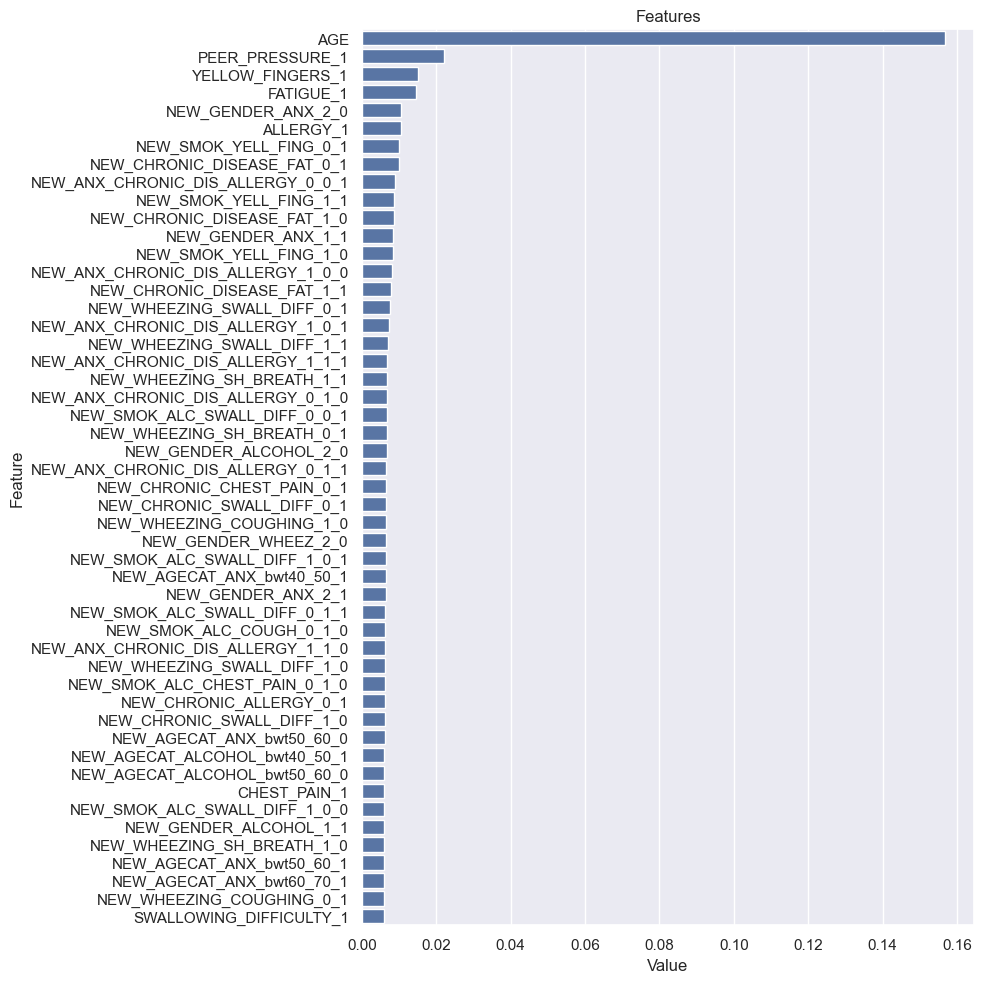

In [ ]:
# Feature Importance
def plot_importance(model, features, num=len(X_test), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X_test,50)

In [ ]:
# Creating Y_pred for Predictions
y_pred = rf_final.predict(X_test)

In [ ]:
print(pd.DataFrame({"Actual" : y_test.squeeze() , "Predicted" : y_pred.squeeze()}).head(10))
print("################################################################################")
print(pd.DataFrame({"Actual" : y_test.squeeze() , "Predicted" : y_pred.squeeze()}).tail(10))

      Actual  Predicted
1690       1          1
1798       1          0
417        0          1
1599       1          1
1206       1          0
647        1          0
2368       0          1
80         0          1
1043       1          0
1260       1          0
################################################################################
      Actual  Predicted
2292       1          1
746        1          0
1736       1          1
846        1          0
923        1          1
813        1          1
174        0          0
2874       0          0
243        1          0
447        0          1


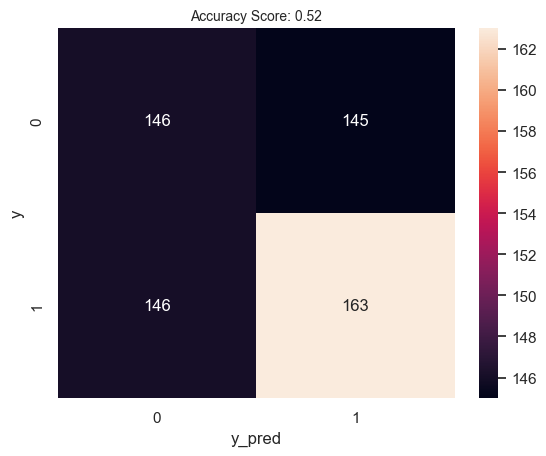

              precision    recall  f1-score   support

           0       0.50      0.50      0.50       291
           1       0.53      0.53      0.53       309

    accuracy                           0.52       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.52      0.52      0.52       600



In [ ]:
#Random Forest Accuracy matrix 
def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()
# Calculate accuracy on the test data
#################

plot_confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

# We can see we didnt get a very good accuracy with this model. We suspect that this is due to the variables in the dataset being so balanced especially within the context of lung cancer. 

In [ ]:
#Getting base parameters for logistic regression 
lr_model = LogisticRegression(random_state=123)
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Model Validation for LR : 10-Fold Cross Validation
cv_results = cross_validate(lr_model, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print("accuracy :",cv_results['test_accuracy'].mean())
print("f1 :",cv_results['test_f1'].mean())
print("roc_auc :",cv_results['test_roc_auc'].mean())

accuracy : 0.49749999999999994
f1 : 0.5049501471139687
roc_auc : 0.4912385760778141


In [ ]:
# Hyperparameter Optimization with GridSearchCV
# Defining the hyperparameter grid
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga']}


lr_best_grid = GridSearchCV(lr_model, lr_params, cv=10, n_jobs=-1, verbose=True).fit(X_train, y_train)

lr_best_grid.best_params_



 # After hyperparameter optimization best params

#{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

 # Final Model


Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:

lr_final = lr_model.set_params(C= .1,penalty = 'l1', solver= 'liblinear',random_state=123).fit(X_train, y_train)    

cv_results = cross_validate(lr_final, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])

print("accuracy :",cv_results['test_accuracy'].mean())
print("f1 :",cv_results['test_f1'].mean())
print("roc_auc :",cv_results['test_roc_auc'].mean())

accuracy : 0.5062499999999999
f1 : 0.5289497908717078
roc_auc : 0.5015207084211094


In [ ]:
y1_pred = lr_final.predict(X_test)
y1_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,

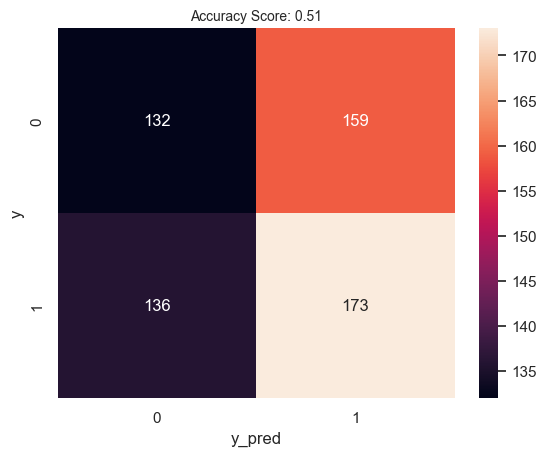

              precision    recall  f1-score   support

           0       0.49      0.45      0.47       291
           1       0.52      0.56      0.54       309

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600



In [ ]:
#Plotting the confusion matrix for our accuracy of logistic regression 
def plot_confusion_matrix(y_test, y1_pred):
    acc = round(accuracy_score(y_test, y1_pred), 2)
    cm = confusion_matrix(y_test, y1_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

#################

plot_confusion_matrix(y_test, y1_pred)

print(classification_report(y_test, y1_pred))

#We can see here that we achieve about a 51% accuracy using logistic regression. 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Base GB model 
#Getting base parameters  
GB_model = GradientBoostingClassifier(random_state=123)
GB_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 8],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at leaf nodes
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GB_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
GBmodel = GradientBoostingClassifier()
GBmodel.fit(X_train, y_train)
GB_final = GB_model.set_params(learning_rate= 0.02, max_depth = 3, min_samples_leaf = 2, min_samples_split= 2, n_estimators =100, random_state=123).fit(X_train, y_train)    

cv_results = cross_validate(GB_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])

print("accuracy :",cv_results['test_accuracy'].mean())
print("f1 :",cv_results['test_f1'].mean())
print("roc_auc :",cv_results['test_roc_auc'].mean())

accuracy : 0.49833333333333335
f1 : 0.5006495524011731
roc_auc : 0.5036787245183335


In [ ]:
y2_pred = GBmodel.predict(X_test)
y2_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,

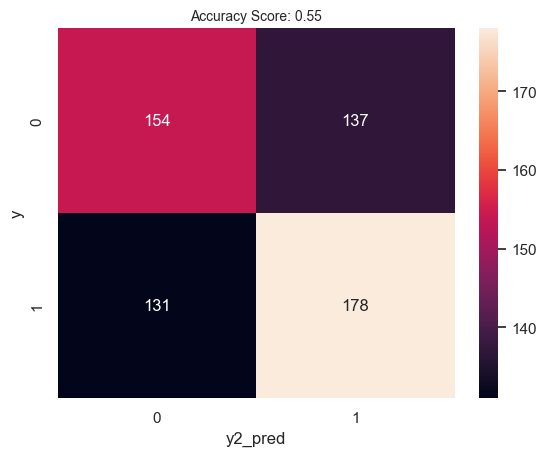

              precision    recall  f1-score   support

           0       0.54      0.53      0.53       291
           1       0.57      0.58      0.57       309

    accuracy                           0.55       600
   macro avg       0.55      0.55      0.55       600
weighted avg       0.55      0.55      0.55       600



In [ ]:
#Plotting the confusion matrix for Gradient Boosting
def plot_confusion_matrix(y_test, y2_pred):
    acc = round(accuracy_score(y_test, y2_pred), 2)
    cm = confusion_matrix(y_test, y2_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y2_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()


#################

plot_confusion_matrix(y_test, y2_pred)

print(classification_report(y_test, y2_pred))

# Here we can see that we recieve the score for our highest model of 55% accuracy on the test set. 

Origins of dataset: Public Dataset with integration of deidentifiable data from various other studies 
Client reccomended models:
Random Forest
Logistic Regression 
GBM 

alternate models to show replication of poor performance.
SVC
KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
#SVC model  
#Getting base parameters  
SVC_model = SVC(random_state=123)
SVC_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
#Using Gridsearch to find optimal hyperparameters 
svc_param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf'],         # Kernel type
    'gamma': ['scale', 'auto'],}

# GridSearchCV for SVC
svc_grid_search = GridSearchCV(estimator=SVC_model,param_grid=svc_param_grid, scoring='accuracy',cv=10, n_jobs=-1).fit(X_train,y_train)
# Best parameters and best score

print("Best Parameters:", svc_grid_search.best_params_)

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
#SVC Final Model.
#Initialize Gradient Boosting model
SVC_final = SVC(C=100, gamma='scale', kernel='rbf', random_state=123).fit(X_train,y_train)

cv_results = cross_validate(SVC_final, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])

print("accuracy :",cv_results['test_accuracy'].mean())
print("f1 :",cv_results['test_f1'].mean())
print("roc_auc :",cv_results['test_roc_auc'].mean())

accuracy : 0.49625
f1 : 0.5127994156744714
roc_auc : 0.5059131507975091


In [ ]:
y3_pred= SVC_final.predict(X_test)


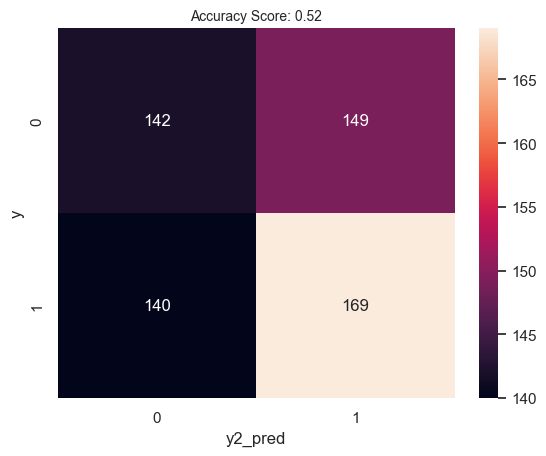

              precision    recall  f1-score   support

           0       0.50      0.49      0.50       291
           1       0.53      0.55      0.54       309

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



In [ ]:
#Plotting the confusion matrix for SVC
def plot_confusion_matrix(y_test, y3_pred):
    acc = round(accuracy_score(y_test, y3_pred), 2)
    cm = confusion_matrix(y_test, y3_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y2_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()


#################

plot_confusion_matrix(y_test, y3_pred)

print(classification_report(y_test, y3_pred))

SVC Shows to perform 

In [ ]:
#KNN model
#Getting base parameters for KNN  
KNN_model = KNeighborsClassifier()
KNN_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#Using Gridsearch to find optimal hyperparameters 
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],         # Number of neighbors
    'weights': ['uniform', 'distance'], # Weight function
    'metric': ['euclidean', 'manhattan'] # Distance metrics
}

# GridSearchCV for KNN
knn_grid_search = GridSearchCV(estimator=KNN_model,param_grid=knn_param_grid,scoring='accuracy',cv=10,n_jobs=-1).fit(X_train,y_train)
print("Best Parameters:", knn_grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
#KNN final model 
#SVC Final Model.
#Initialize Gradient Boosting model
KNN_final = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, weights= 'distance').fit(X_train,y_train)

cv_results = cross_validate(KNN_final, X_train, y_train, cv=10, scoring=["accuracy", "f1", "roc_auc"])

print("accuracy :",cv_results['test_accuracy'].mean())
print("f1 :",cv_results['test_f1'].mean())
print("roc_auc :",cv_results['test_roc_auc'].mean())

accuracy : 0.4945833333333332
f1 : 0.49622788284465136
roc_auc : 0.4979407498881095


In [ ]:
y4_pred= KNN_final.predict(X_test)

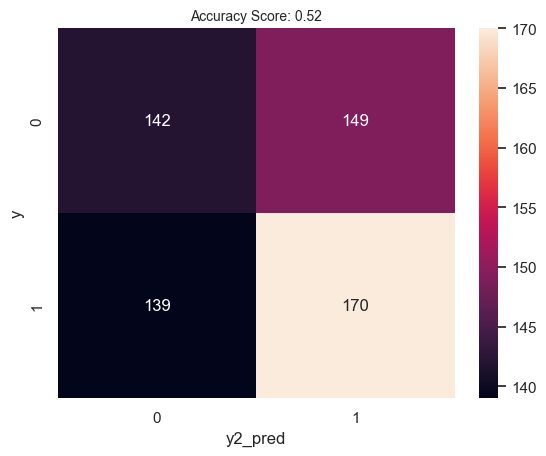

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       291
           1       0.53      0.55      0.54       309

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



In [ ]:
#Plotting the confusion matrix for KNN
def plot_confusion_matrix(y_test, y4_pred):
    acc = round(accuracy_score(y_test, y4_pred), 2)
    cm = confusion_matrix(y_test, y4_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y2_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()


#################

plot_confusion_matrix(y_test, y4_pred)

print(classification_report(y_test, y4_pred))

Overall the models that performed the best for us were the Gradient Boosting Model with a 55% accuracy, Random Forest with a 52% accuracy and the lowest model was Logistic Regression only getting about a 51% accuracy. For the alternate models we tested SVC and KNN model. They both performed the same with about a 52% accuracy scoring higher than logistic regression but lower or the same as the other two models tested for. 